# TD trajectoire -- cercle

### ***Chargement des données***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trajectoire = np.load("trajectoire.npz")
print(trajectoire.files)

['u', 'v']


In [3]:
u = trajectoire[trajectoire.files[0]]
v = trajectoire[trajectoire.files[1]]

In [4]:
print("La dimension de la donnée u est ",u.shape)
print("La dimension de la donnée v est ",v.shape)

La dimension de la donnée u est  (41,)
La dimension de la donnée v est  (41,)


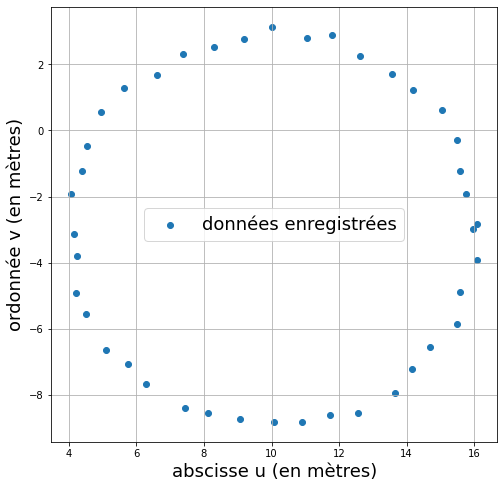

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(u, v, label="données enregistrées")
plt.xlabel('abscisse u (en mètres)', fontsize=18)
plt.ylabel('ordonnée v (en mètres)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()


***


###  ***Modélisation envisagée***  
Le contexte de l'acquisition, corroboré par la visualisation graphique des données, invite à rechercher une modélisation de la relation entre l'abscisse $\boldsymbol{u}$ et l'ordonnée $\boldsymbol{v}$ par l'équation d'un cercle : 
$$(u-u_0)^2+(v-v_0)^2=R^2$$

In [6]:
# Calculer ici :
# 1) les paramètres du cercle par la méthode des moindres carrés
M, V = np.stack((2*u, 2*v, np.ones(len(u))), axis=1), u**2 + v**2
Resultat = list(np.linalg.lstsq(M, V,rcond=None))
u0, v0, _ = Resultat[0]
r = np.sqrt(_ + u0**2 + v0**2)

#### Visualisation graphique

In [7]:
n = 50
theta = np.linspace(0, 2*np.pi, n)
hatU, hatV = u0 + r * np.cos(theta), v0 + r * np.sin(theta)

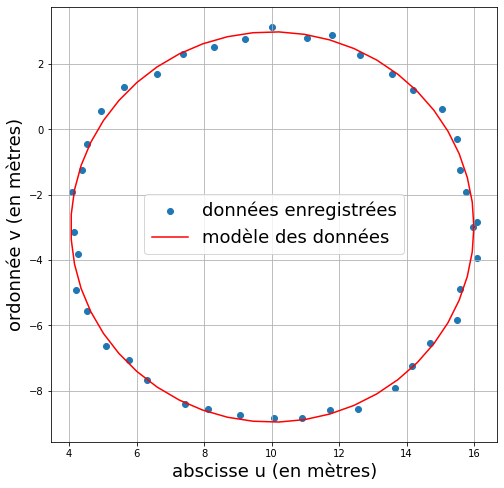

In [8]:
# 2) puis un ensemble de coordonnées (hatU,hatV) de points appartenant à ce cercle modélisant les données
plt.figure(figsize=(8,8))
plt.scatter(u, v, label="données enregistrées")
plt.plot(hatU, hatV, c='r', label="modèle des données")
plt.xlabel('abscisse u (en mètres)', fontsize=18)
plt.ylabel('ordonnée v (en mètres)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()